                             RED WINE QUALITY PREDICTION

Q1) Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings("ignore")

# Data Collection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1) instead of downloading the entire dataset on my local computer i am simply loading the file directly from the  Github repository link using raw option.
2) by taking a look at the dataset i can see that the column Quality is the target label making the remaining columns are the features that we can customize and use to predict our label. this classifies to be CLASSIFICATION PROBLEM.

# Data Analysis

In [3]:
df.shape

(1599, 12)

I can see that there are total 1599 rows and 12 columns are presented in our dataset.

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

in this dataset i don't see any missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In this dataset none of the columns have any object data type values and our label is the only integer value making all the feature columns as float datatype i.e. similar datatype

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Using the describe method i can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per My Observation
1) There is a big gap between 75% and Max values of residual sugar column
2) There is a big gap benteen 75% and Max Values of free sulfur dioxide column
3) There is a big gap between 75% and Max values of total sulfur dioxide column

All these gaps indicate that there are outliers present in our dataset which is might to be treated so as get better model accuracy later.

In [8]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Here we see the SKEWNESS INFORMATION present in our dataset. We will ingore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol are all outside the acceptable range of +/-0.5. Thise skewness indicates outliers being present in our dataset that will need to be treated if required.  

# Visualization

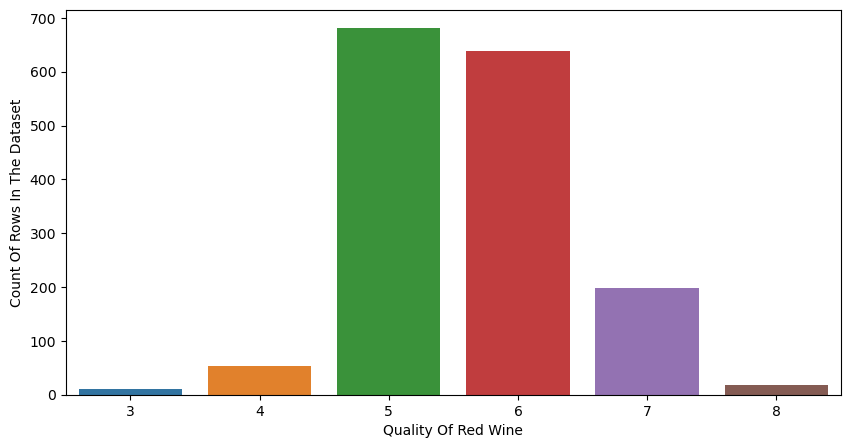

In [9]:
plt.figure(figsize= (10,5))
sns.countplot(x="quality", data= df)
plt.xlabel("Quality Of Red Wine")
plt.ylabel("Count Of Rows In The Dataset")
plt.show()

In the "COUNTPLOT" representation i see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be reactified so that our machine learning do not biased to a certain value during prediction.

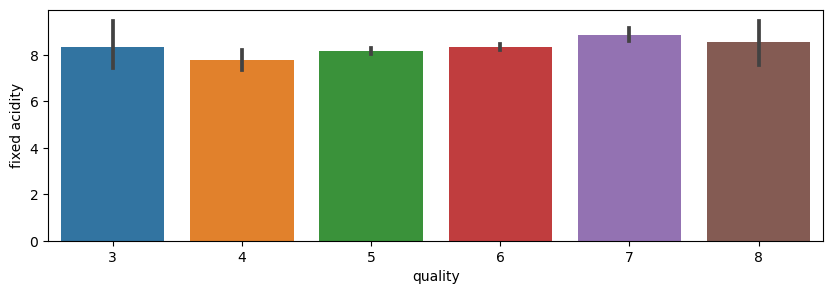

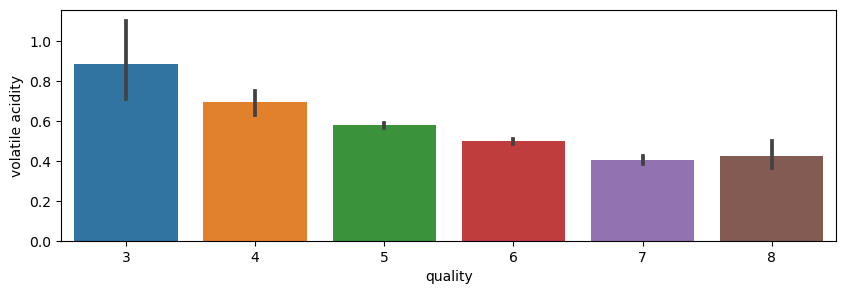

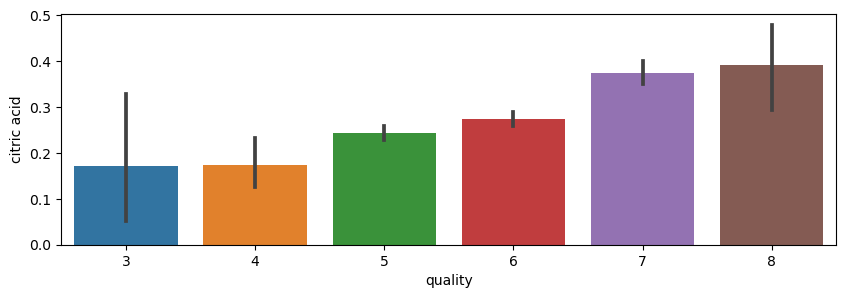

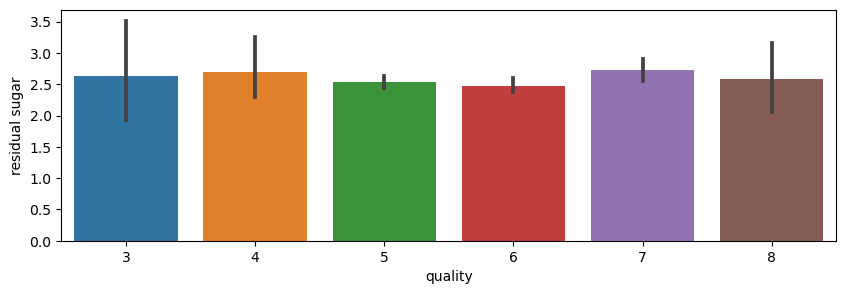

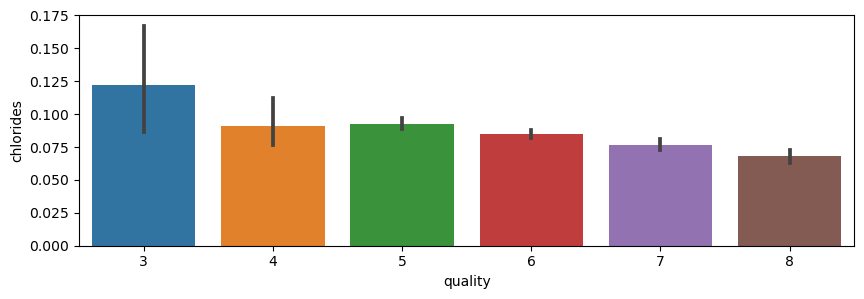

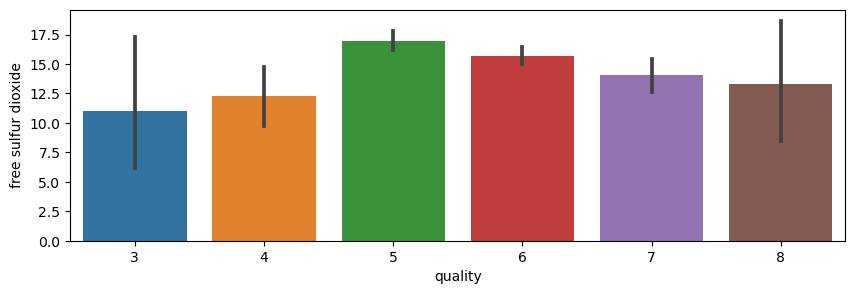

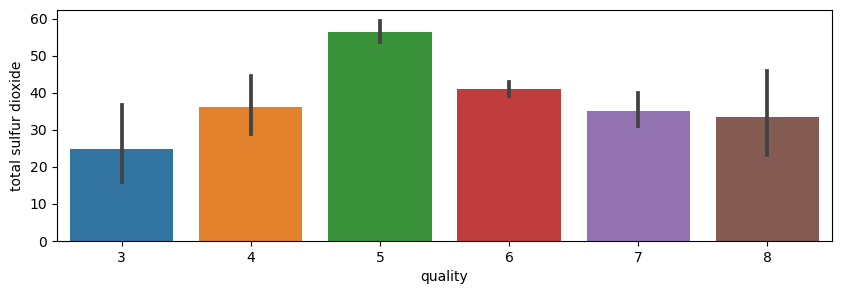

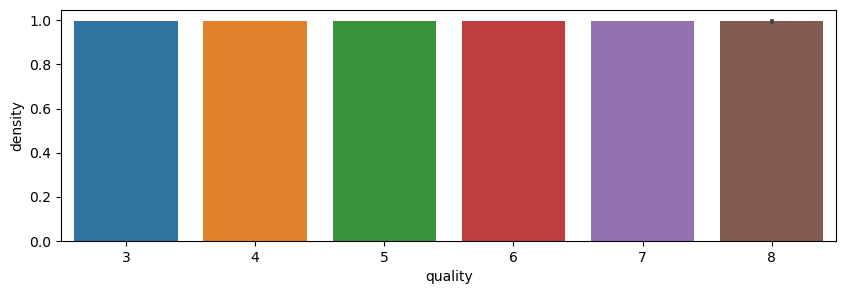

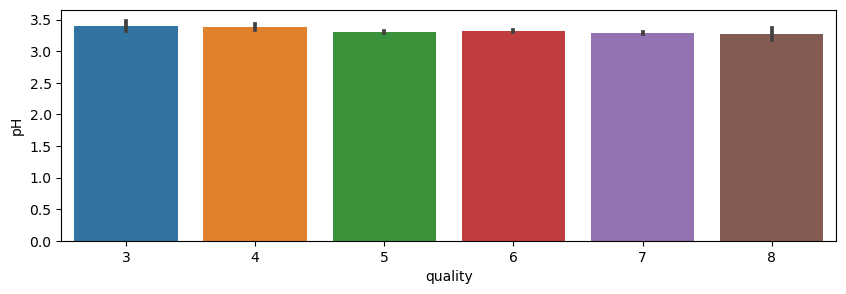

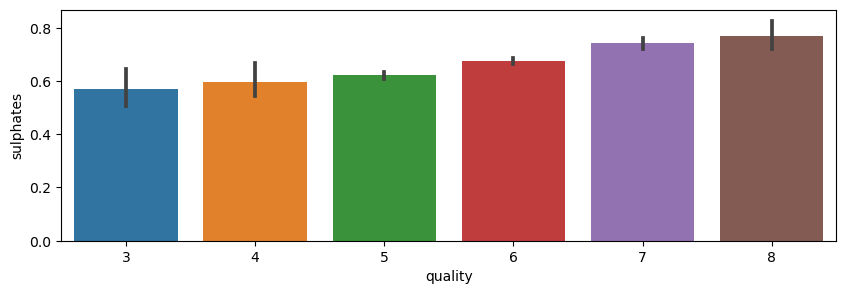

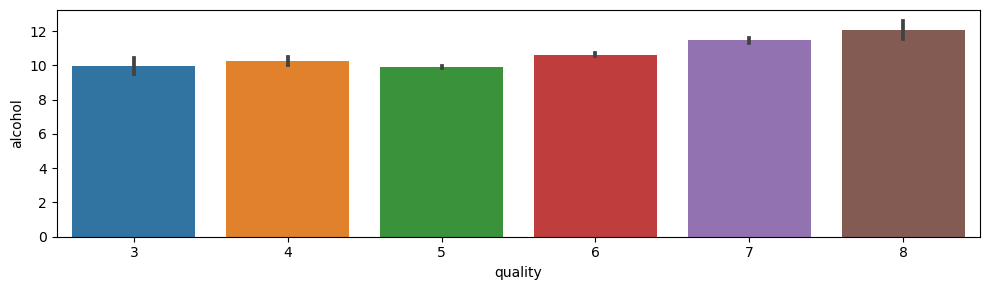

In [10]:
index = 0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,3))
    sns.barplot(x=labels, y=col[index], data =df)
plt.tight_layout()
plt.show()

The feature vs label barplot we able to see the trend corresponding to the impact  each has with respect to predicting the quality column(our target variable)

Observations regarding feature compared to the label are:-

1) fixed acidity vs quality - No fixed pattern
2) volatile acidity vs quality - There is an Decreasing trend
3) citric acid vs quality - There is an Increasing trend
4) residual sugar vs quality - No fixed pattern
5) chlorides vs quality - There is an Decreasing trend
6) free sulfur dioxide vs quality - No fixed pattern as it is increasing then decreasing
7) total sulfur dioxide vs quality - No fixed pattern as it is increasing then decreasing
8) density vs quality - No fixed pattern
9) pH vs quality -  No fixed pattern
10) sulphates vs quality - There is an Increasing trend
11) alcohol vs quality - There is an Increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

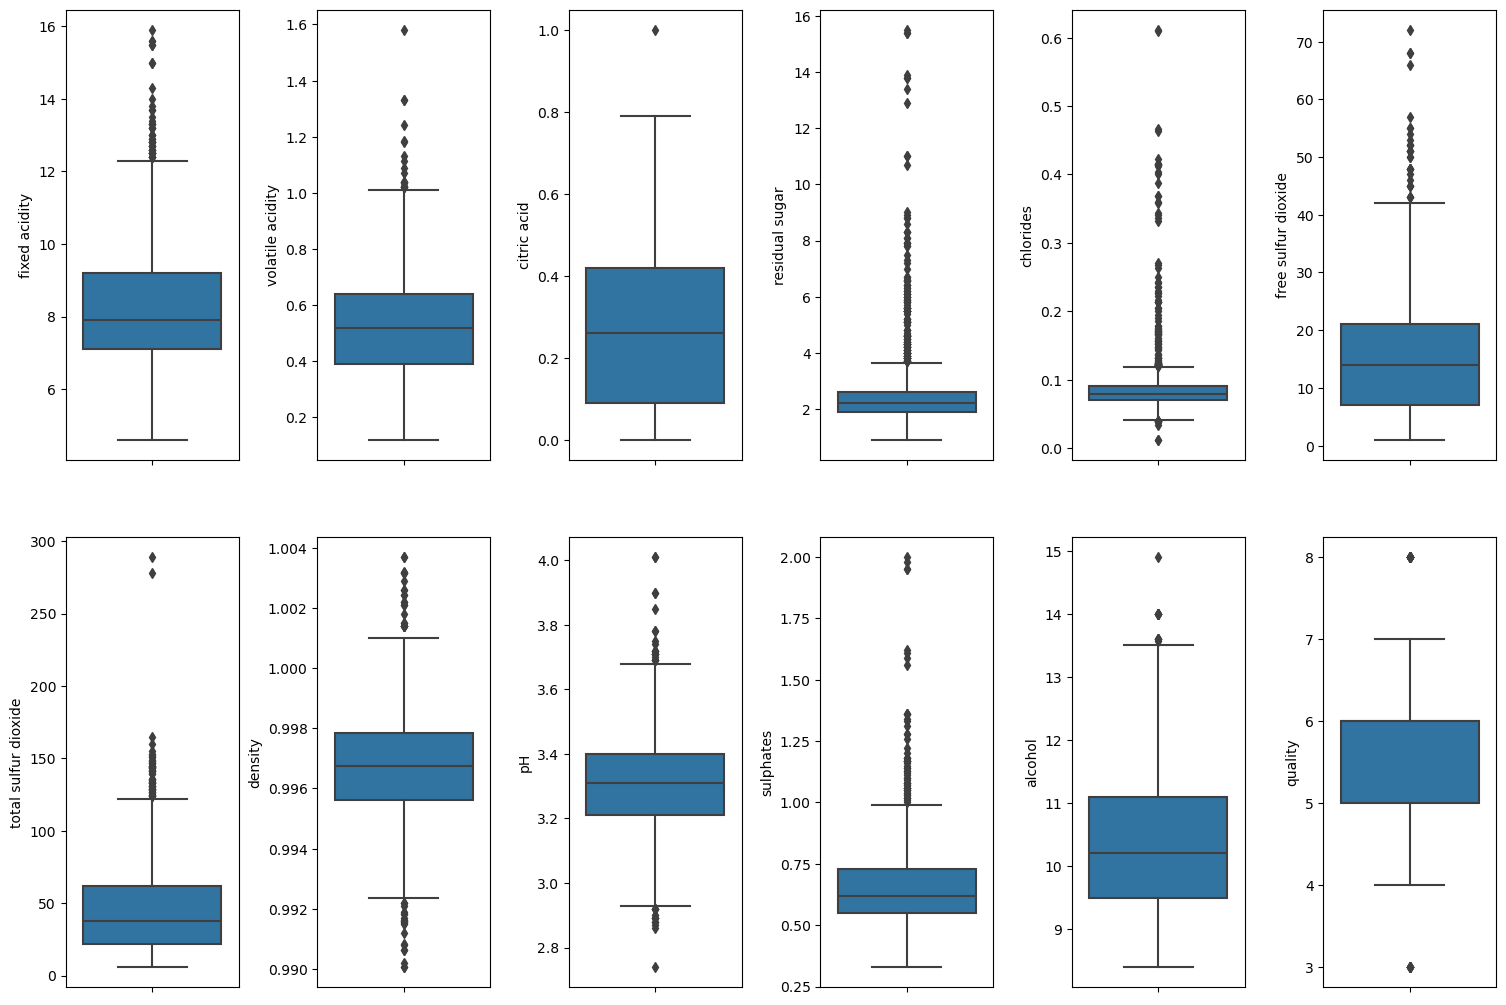

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index= 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

With the help of the above boxplot we are able to see whisker details and outliers cleary. I am ingnoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset. 

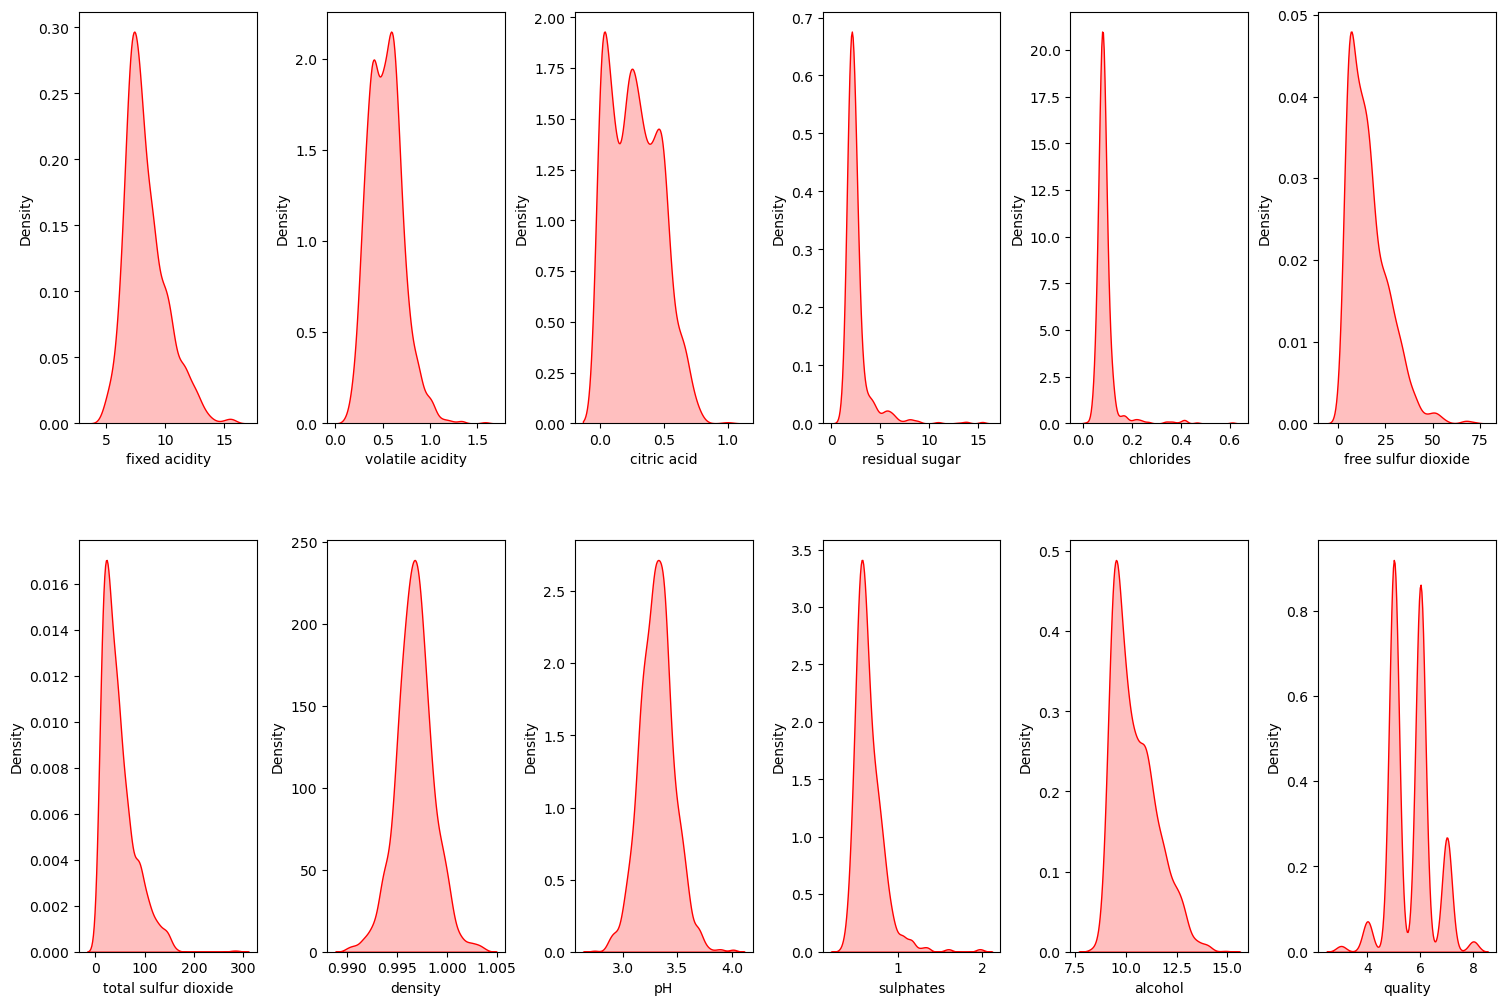

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color='r', kde_kws={'shade': True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citic acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

with respect to the treatment of skewness and outliers i will perform the removal or treatment after i can see the accuracy dependency of the machine learning models.

# Correlation using a Heatmap

1. Positive Correlation- A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative Correlation- A correlation of -1 indicates a perfect negative correlation, meaning that as one variables goes up, the other goes down.

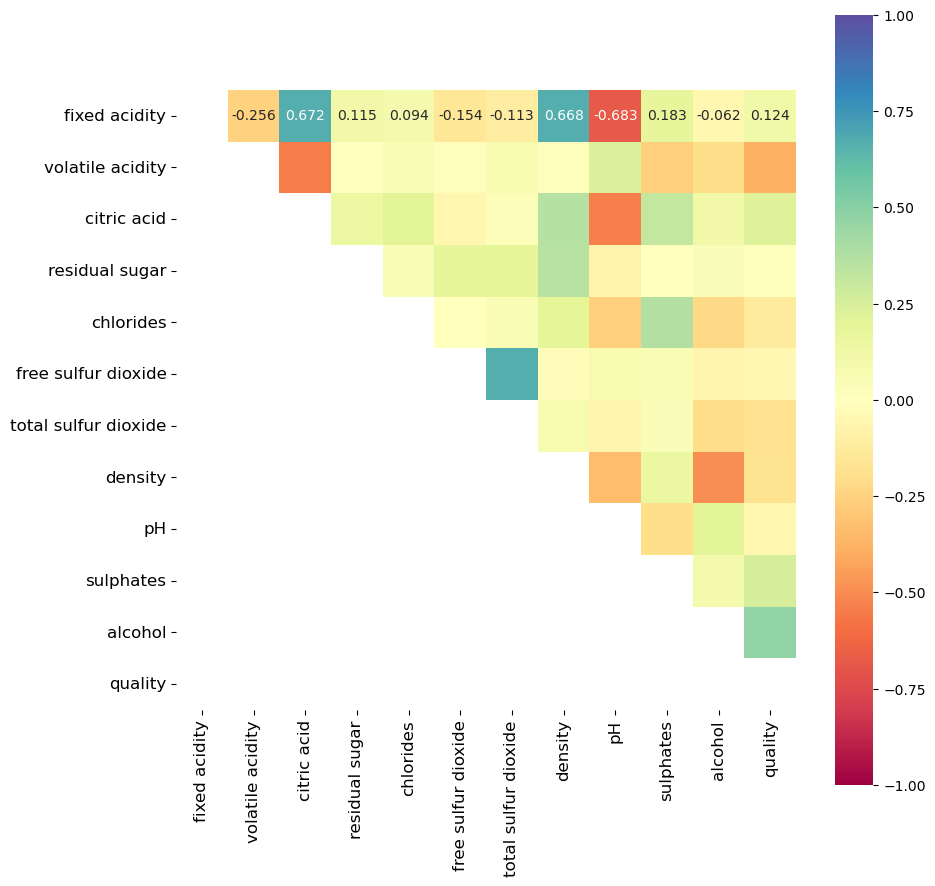

In [13]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True, square= True, fmt='0.3f',
            annot_kws={'size':10}, cmap='Spectral', mask = lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

I can see that the above heatmap shows the correlation matrix  data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation i see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with  residual sugar showing a coefficient value of 0.014 that close to 0. similarity we can bifurcate all the other positive and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r' is exactly +1 or -1 then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now i see columns fixed acidity and citric acid are positively correlated with a value of 0.672 which is close to 1. Similary columns fixed acidity and density are positively correlated with a value of 0.668 again being close to the value 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value1. The only negatively correlated columns that pop up are fixed acidity and pH with a vlaue-0.683 being close to the value -1.
We may need to deal with multicollinearity later if later if required to improve the accuracy of our machine learning models.

# Dropping a column

In [14]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I feel that free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide there for i am dropping the free option and keeping just the total option in our dataset.

# Outlier removel

In [15]:
df.shape

(1599, 11)

In [16]:
import scipy.stats as stats
from scipy.stats import zscore

In [17]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [18]:
df.shape

(1464, 11)

Checking the number of rows present in the dataset after applying the outlier removal technique.

In [19]:
data_loss = (1599-1464)/1599*100
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

After removing the outliers we are checking the data loss percentage by comparing the rows in our original dataset and the new dataset post removal of the outlier.

# Splitting The Dataset into 2 variables namely 'X' and 'Y' for feature and label

In [20]:
X = df.drop('quality', axis = 1)
Y = df['quality']

I have bifurcated the dataset into features and labels and where X represents all the feature columns and Y represents the target label column.

# Taking care  of class imbalance

In [21]:
Y.value_counts()

quality
5    624
6    590
7    187
4     47
8     16
Name: count, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [24]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

Displaying just the label

# Label Binarization

In [25]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

Using the label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [26]:
X # Displaying all the features except the label.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,9.480520,0.374632,0.484145,3.258659,0.071634,15.048701,0.995565,3.216342,0.731223,12.531710
3116,7.429039,0.370454,0.302323,1.840655,0.074116,23.593449,0.994083,3.237677,0.701162,11.498734
3117,11.077576,0.427444,0.574282,2.026009,0.066128,41.831862,0.997330,3.027893,0.820000,10.474216
3118,7.297319,0.370268,0.305134,1.902681,0.064759,26.567016,0.994462,3.234866,0.730804,11.348660


# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Dosplaying all the feature after applying scaling technique to avoid bias output 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.645538,1.049376,-1.509092,-0.631160,-0.146979,-0.105194,0.831641,1.443578,-0.806101,-1.241608
1,-0.395869,2.068423,-1.509092,0.140231,1.053897,1.133192,0.228228,-0.745049,0.099445,-0.887810
2,-0.395869,1.389058,-1.303929,-0.190365,0.726385,0.645343,0.348910,-0.321444,-0.126941,-0.887810
3,1.726310,-1.328401,1.363202,-0.631160,-0.201564,0.870504,0.952324,-1.027453,-0.655177,-0.887810
4,-0.645538,1.049376,-1.509092,-0.631160,-0.146979,-0.105194,0.831641,1.443578,-0.806101,-1.241608
...,...,...,...,...,...,...,...,...,...,...
3115,0.653061,-0.792654,0.974134,0.866065,-0.385287,-0.816376,-0.517013,-0.629673,0.485985,1.528378
3116,-0.627412,-0.816306,0.041552,-0.696557,-0.249809,-0.495719,-1.411164,-0.479048,0.259135,0.614714
3117,1.649897,-0.493664,1.436457,-0.492300,-0.685855,0.188711,0.547927,-1.960142,1.155916,-0.291468
3118,-0.709628,-0.817360,0.055970,-0.628206,-0.760585,-0.384130,-1.182490,-0.498893,0.482825,0.481974


Even  thought all our feature columns were of float data type i was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore i am using the standard scaler method to ensure all my feature columns have been standardized.

# Creating the training and testing data sets

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

I am  taking 20 persent of the complete dataset for training purpose and the remaining 80 percent with be used to train the machine learning models.

# Machine Learning Model for Classification and Evaluation Metrics

In [30]:
def  classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

    model.fit(X_train, Y_train) #training the module
    pred = model.predict(X_test) # predicting Y_test
    acc_score = (accuracy_score(Y_test, pred))*100 # accuracy score
    print("Acccuracy Score:", acc_score)
    class_report = classification_report(Y_test, pred) # classification Report
    print("\nClassification Report:\n", class_report)
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100 # Cross validation score
    print("Cross Validation Score:", cv_score)
    result = acc_score - cv_score # Result of Accuracy minus cv scores
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score and cross validation score for any machine laerning model that calls for this function.

In [31]:
# logistic Regression
model= LogisticRegression()
classify(model, X, Y)

Acccuracy Score: 90.7051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       391
           1       0.87      0.89      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 88.17307692307692

Accuracy Score - Cross Validation Score is 2.5320512820512846


Created the Logistic Regression model and checked for it's evaluation metrics.

In [32]:
# Support Vector Classifier
model= SVC(C=1.0, kernel='rbf',  gamma='auto', random_state=42)
classify(model, X, Y)

Acccuracy Score: 92.46794871794873

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       391
           1       0.89      0.91      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.93      0.92      0.92       624

Cross Validation Score: 89.74358974358975

Accuracy Score - Cross Validation Score is 2.724358974358978


Created the support vector classifier model and checked for it's evaluation metrics.

In [33]:
# Decision Tree Classifier
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Acccuracy Score: 92.46794871794873

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       391
           1       0.88      0.93      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.93      0.92       624
weighted avg       0.93      0.92      0.93       624

Cross Validation Score: 88.75

Accuracy Score - Cross Validation Score is 3.7179487179487296


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [34]:
# Random Forest Classifier
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Acccuracy Score: 95.3525641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.93      0.95      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.33974358974358

Accuracy Score - Cross Validation Score is 3.012820512820525


Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [35]:
# K Neighbours Classifier
model = KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Acccuracy Score: 91.18589743589743

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       391
           1       0.86      0.92      0.89       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 88.07692307692308

Accuracy Score - Cross Validation Score is 3.1089743589743506


Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [36]:
# Extra Trees Classifier
model=ExtraTreesClassifier()
classify(model, X, Y)

Acccuracy Score: 96.15384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.93      0.97      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.17307692307693

Accuracy Score - Cross Validation Score is 2.9807692307692264


Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

# Hyper parameters tuning on the best ML Model 

In [37]:
# Choosing Support Vector Classifier
svc_param =  {'kernel': ['poly', 'sigmoid', 'rbf'],
              'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
              'probability' : [True, False],
              'decision_function_shape' : ['ovo','ovr'],
              'verbose' : [True, False]}

After comparing  all the clssification models i have selected support vector classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [38]:
GSCV =  GridSearchCV(SVC(), svc_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model. 

In [39]:
GSCV.fit(X_train, Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [40]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Here the Grid Search CV has provided me with the best parameters list out of all combinations it used to train the model.

In [41]:
Final_Model = SVC(decision_function_shape = 'ovo', gamma = 'scale', kernel = 'rbf',  probability = True, random_state = 21,
                  shrinking = True, verbose = True)
Classifier = Final_Model.fit(X_train,  Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.46794871794873


I have successfully incorporated the Hyper Parameter Tunning on my Final Model and received the accurancy score for it.

# Saving The Model

In [42]:
import joblib

In [43]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']

Finally I am saving my best classification model using the joblib library.